<a href="https://colab.research.google.com/github/NishiZanje97/Bank_Term_Deposit_Prediction/blob/main/sl_bankmarketing_termdeposit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing-dataset/bank.csv


# PROBLEM STATEMENT
**The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**



**#input variables(bank client data):**

**#age | int64 | age in years**

**#job | object | type of job (categorical: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar' 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed' 'student'])
**
**#marital | object | marital status (categorical: ['married' 'single' 'divorced'])**

**#education | Object | education background (categorical: ['secondary' 'tertiary' 'primary' 'unknown'])**

**#default | Object | has credit in default? (categorical: ['no' 'yes'])**

**#balance | int64 | Balance of the individual**

**#housing | object | has housing loan? (categorical: ['yes' 'no'])**

**#loan | object | has personal loan? (categorical: ['no' 'yes'])**

**#contact | object | contact communication type (categorical: ['unknown' 'cellular' 'telephone'])**

**#day | int64 | last contact day of the week (categorical: 'mon','tue','wed','thu','fri')**

**#month | object | last contact month of year (categorical: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'])**

**#duration | int64 | last contact duration, in seconds (numeric)**

**#campaign | int64 | number of contacts performed during this campaign and for this client**

**#pdays | int64 | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)**

**#previous | int64 | number of contacts performed before this campaign and for this client**

**#poutcome | object | outcome of the previous marketing campaign (categorical: ['unknown' 'other' 'failure' 'success'])****


**#Output variable (desired target):
#y-has the client subscribed a term deposit? (binary: 'yes','no')**

*Import libraries*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore and Visualize the features

##  Load the dataset

In [ ]:
df=pd.read_csv('../input/bank-marketing-dataset/bank.csv')

In [ ]:
#Shows top 5 records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
#shows no. of rows and columns
df.shape

(11162, 17)

In [ ]:
#checks if null values present(0)
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
#shows datatype and null values present for all columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
#shows no.of unique values per column
for column in df.columns:
    print(column,df[column].nunique())

age 76
job 12
marital 3
education 4
default 2
balance 3805
housing 2
loan 2
contact 3
day 31
month 12
duration 1428
campaign 36
pdays 472
previous 34
poutcome 4
deposit 2


In [ ]:
#shows statistical summary for numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Data Preprocessing: Label Encoder

In [ ]:
#converts categorical columns to numeric format
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['n_deposit']=le.fit_transform(df['deposit'])

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,n_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,0


In [ ]:
#deleted 2 columns from dataset 
df.drop(['deposit','pdays'],axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,n_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,0


In [ ]:
#checks no. of values in deposit column(balanced data)
df.n_deposit.value_counts()

0    5873
1    5289
Name: n_deposit, dtype: int64

## Categorical Feature Distribution

<AxesSubplot:xlabel='n_deposit', ylabel='count'>

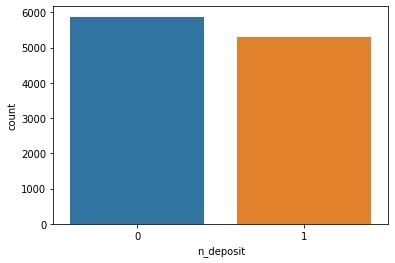

In [ ]:
#balanced output data
sns.countplot(x='n_deposit',data=df)


In [ ]:
#shows unique values for all columns
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique()) 


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']


**Client with job type as management records are high and housemaid are very less**

## Data Visualization

<AxesSubplot:xlabel='count', ylabel='job'>

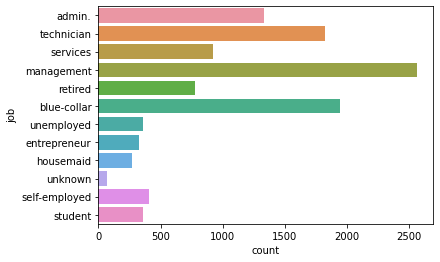

In [ ]:
#client with job profile managemnent is higher and less for housemaid.
sns.countplot(y='job',data=df)


<AxesSubplot:xlabel='count', ylabel='marital'>

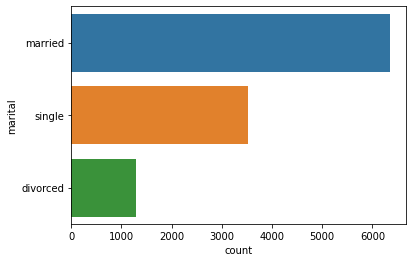

In [ ]:
#client who married are high in records and divorced are less
sns.countplot(y='marital',data=df)


<AxesSubplot:xlabel='count', ylabel='education'>

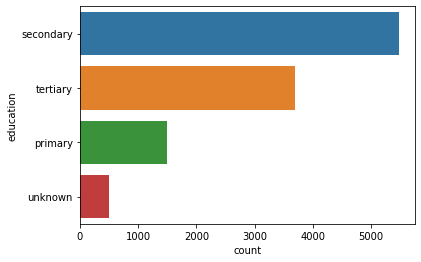

In [ ]:
sns.countplot(y='education',data=df)
#client whoes education background is secondary are in high numbers

<AxesSubplot:xlabel='count', ylabel='default'>

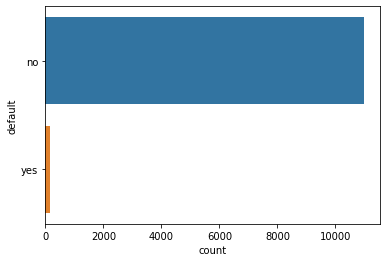

In [ ]:
sns.countplot(y='default',data=df)
#defualt feature looks unimportant  as it has value of no at high ratio to value yes(highly imbalance) which can drop

<AxesSubplot:xlabel='count', ylabel='housing'>

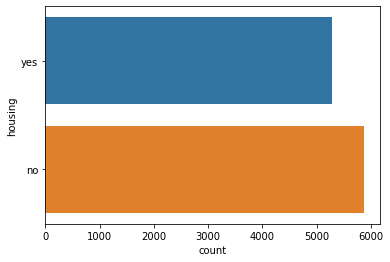

In [ ]:
sns.countplot(y='housing',data=df)
##balance in housing loan for clients

<AxesSubplot:xlabel='count', ylabel='loan'>

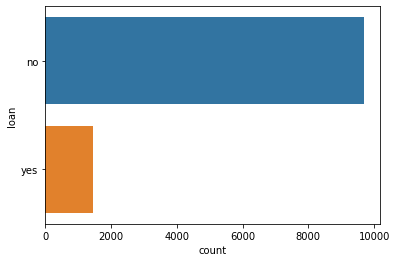

In [ ]:
sns.countplot(y='loan',data=df)
#high no. of clients with no personal loan

<AxesSubplot:xlabel='count', ylabel='contact'>

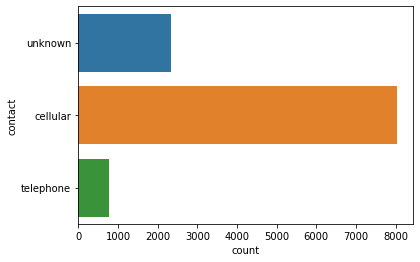

In [ ]:
sns.countplot(y='contact',data=df)

<AxesSubplot:xlabel='count', ylabel='month'>

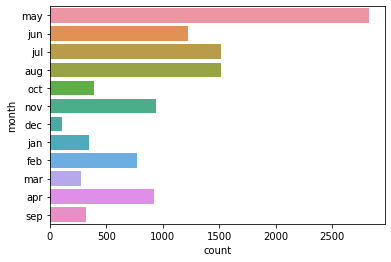

In [ ]:
sns.countplot(y='month',data=df)
#data in month of may is high and less in dec

<AxesSubplot:xlabel='count', ylabel='poutcome'>

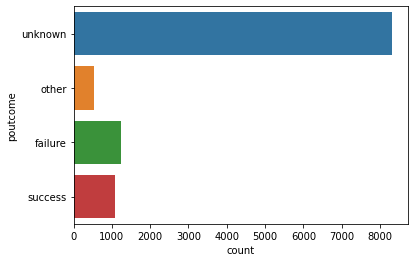

In [ ]:
sns.countplot(y='poutcome',data=df)

In [ ]:
#applying label encoder on categorical columns
df['n_job']=le.fit_transform(df['job'])
df['n_marital']=le.fit_transform(df['marital'])
df['n_education']=le.fit_transform(df['education'])
df['n_loan']=le.fit_transform(df['loan'])
df['n_contact']=le.fit_transform(df['contact'])
df['n_month']=le.fit_transform(df['month'])
df['n_poutcome']=le.fit_transform(df['poutcome'])
df['n1_deposit']=df['n_deposit']

In [ ]:
df.drop(['n_deposit'],axis=1,inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,0,unknown,0,1,1,0,2,8,3,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,0,unknown,0,1,1,0,2,8,3,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,0,unknown,9,1,1,0,2,8,3,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,0,unknown,7,1,1,0,2,8,3,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,0,unknown,0,1,2,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,...,0,unknown,1,2,0,0,0,0,3,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,...,0,unknown,7,1,1,0,2,6,3,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,...,0,unknown,9,2,1,0,0,1,3,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,...,5,failure,9,1,1,1,0,8,0,0


In [ ]:
df.drop(['job','month','marital','education','default','housing','loan','contact','poutcome'],axis=1,inplace=True)


In [ ]:
df.head()

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1


In [ ]:
#shows all uniquevalues per column
for col in df.select_dtypes(include='int64').columns:
  print(col)
  print(df[col].unique()) 

age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
balance
[2343   45 1270 ... 1594 2593 -134]
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
duration
[1042 1467 1389 ... 1504  818 1812]
campaign
[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
previous
[ 0  1  4  2  3 10  7  9  5 29  6 13 17  8 11 30 22 58 21 14 26 12 19 55
 23 15 20 27 16 41 40 28 18 37]
n_job
[ 0  9  7  4  5  1 10  2  3 11  6  8]
n_marital
[1 2 0]
n_education
[1 2 0 3]
n_loan
[0 1]
n_contact
[2 0 1]
n_month
[ 8  6  5  1 10  9  2  4  3  7  0 11]
n_poutcome
[3 1 0 2]
n1_deposit
[1 0]


In [ ]:
df.describe()

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,0.832557,4.487905,1.199337,1.285164,0.130801,0.489697,5.445709,2.477782,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,2.292007,3.225132,0.625552,0.749478,0.337198,0.818724,3.191939,1.002952,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,1.000000,7.000000,2.000000,2.000000,0.000000,1.000000,8.000000,3.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,58.000000,11.000000,2.000000,3.000000,1.000000,2.000000,11.000000,3.000000,1.000000


# Outlier Detection

<AxesSubplot:xlabel='n1_deposit', ylabel='n_poutcome'>

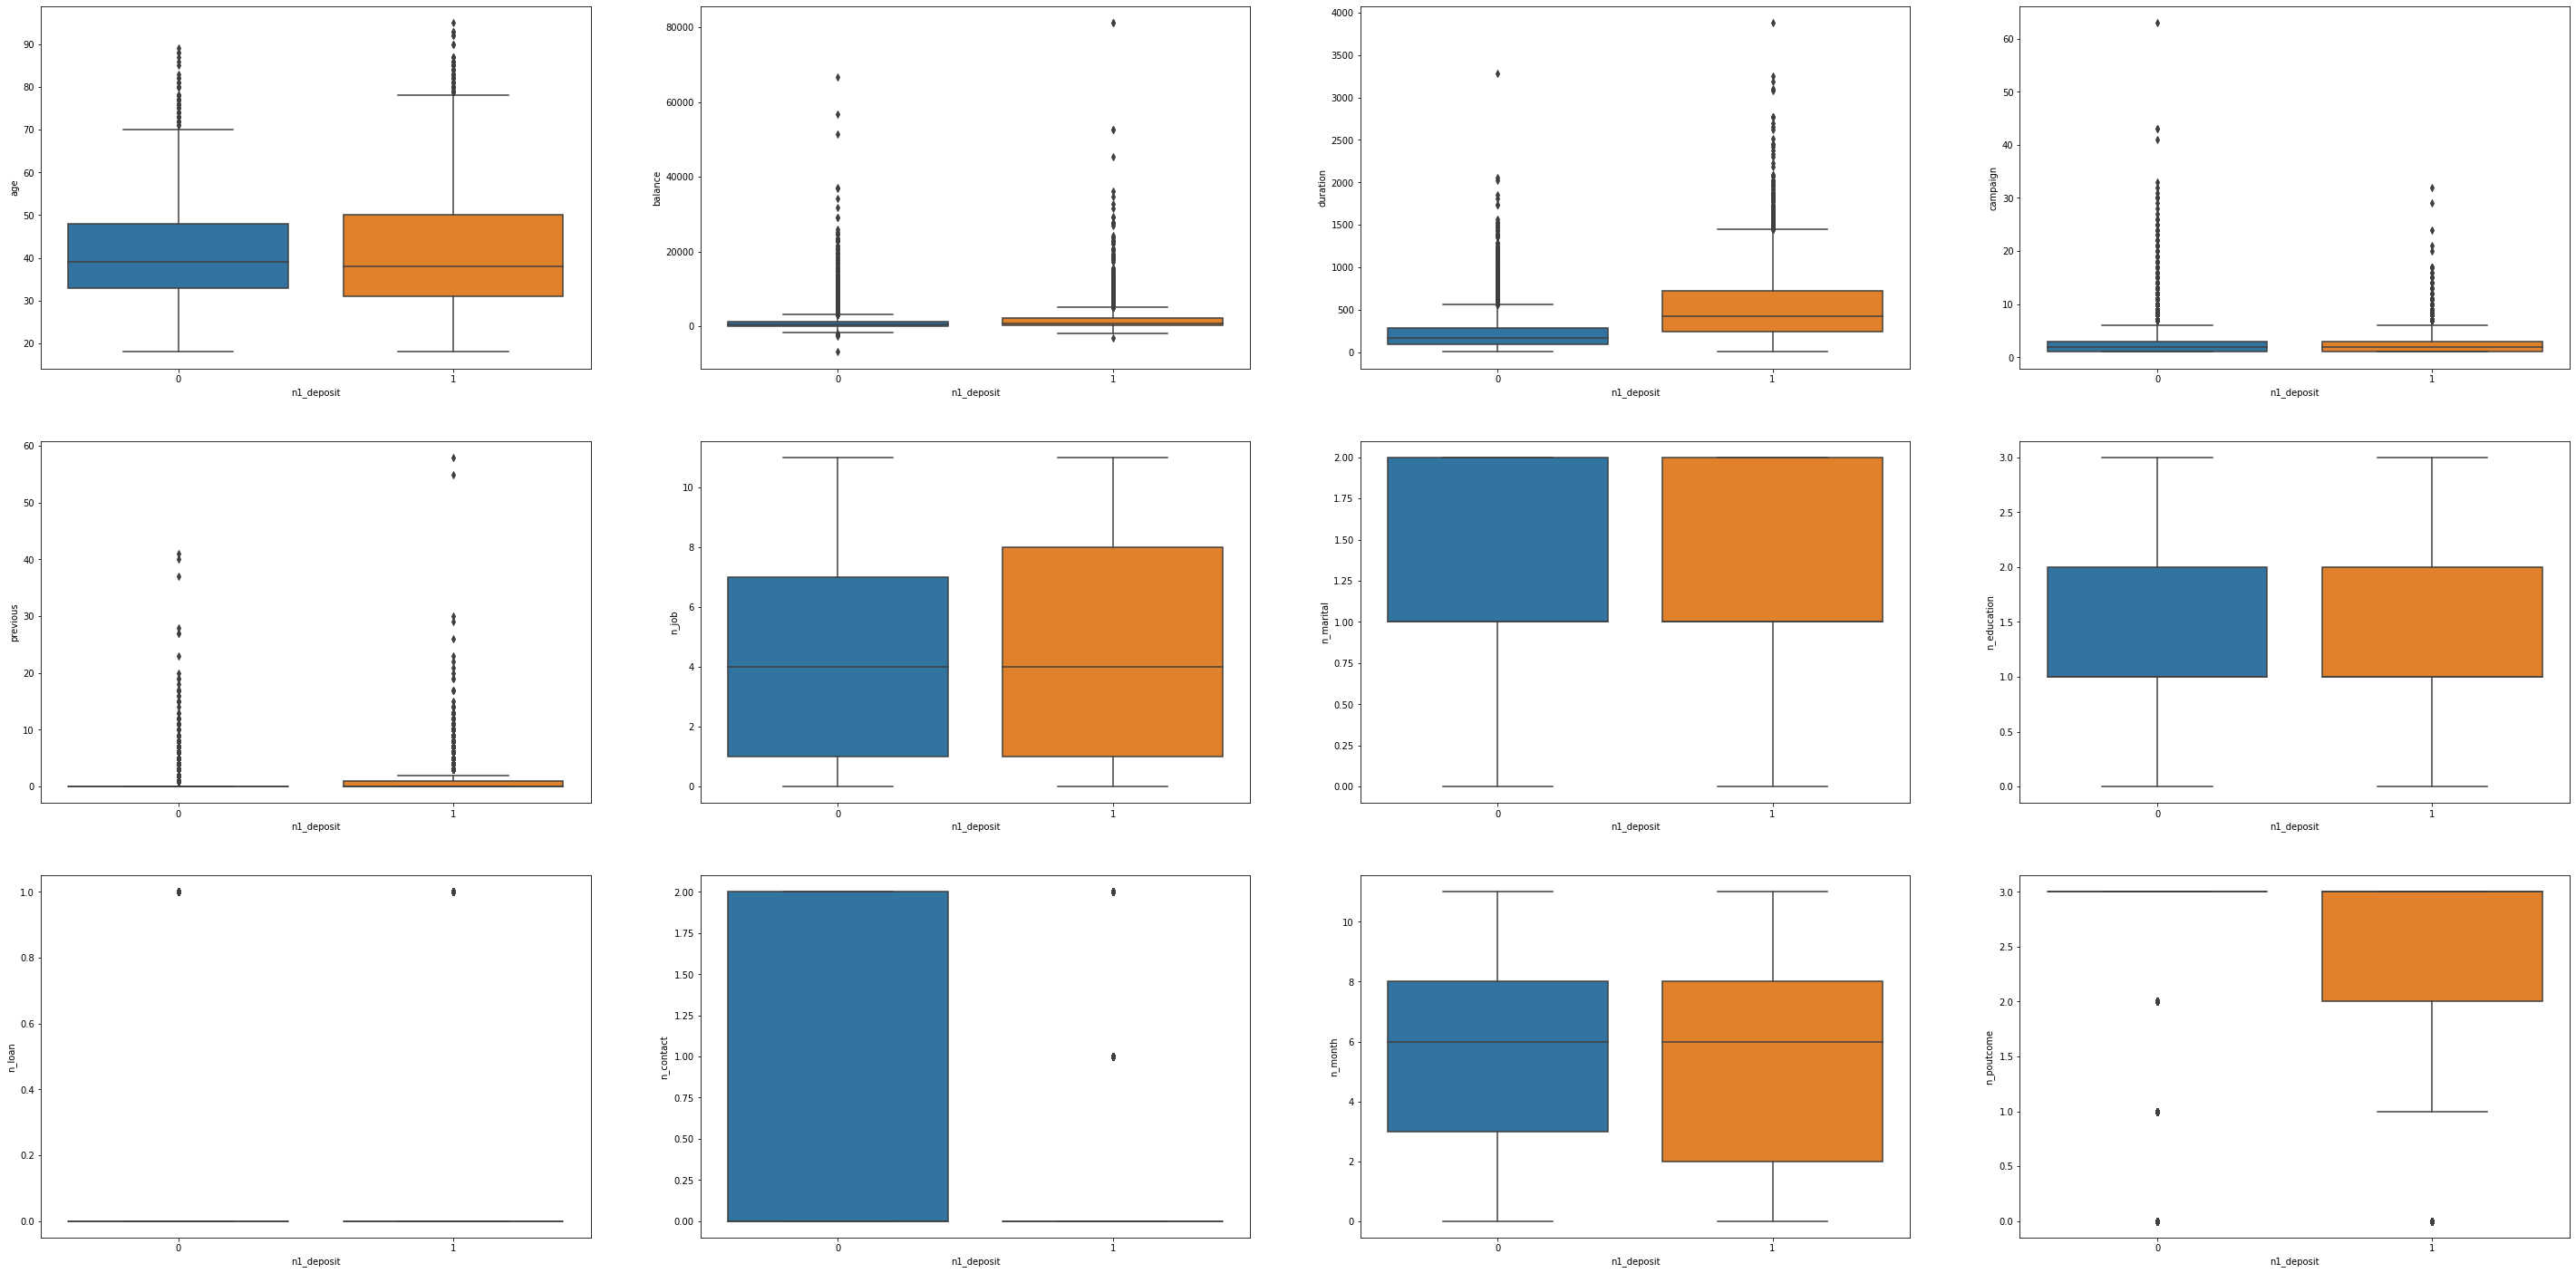

In [ ]:
figure, axis = plt.subplots(3, 4, figsize = (50,25))
sns.boxplot(x='n1_deposit',y='age',data=df,ax=axis[0,0])
sns.boxplot(x='n1_deposit',y='balance',data=df,ax=axis[0,1])
sns.boxplot(x='n1_deposit',y='duration',data=df,ax=axis[0,2])
sns.boxplot(x='n1_deposit',y='campaign',data=df,ax=axis[0,3])
sns.boxplot(x='n1_deposit',y='previous',data=df,ax=axis[1,0])
sns.boxplot(x='n1_deposit',y='n_job',data=df,ax=axis[1,1])
sns.boxplot(x='n1_deposit',y='n_marital',data=df,ax=axis[1,2])
sns.boxplot(x='n1_deposit',y='n_education',data=df,ax=axis[1,3])
sns.boxplot(x='n1_deposit',y='n_loan',data=df,ax=axis[2,0])
sns.boxplot(x='n1_deposit',y='n_contact',data=df,ax=axis[2,1])
sns.boxplot(x='n1_deposit',y='n_month',data=df,ax=axis[2,2])
sns.boxplot(x='n1_deposit',y='n_poutcome',data=df,ax=axis[2,3])




In [ ]:
#shows all record whose deposit value is 0 
outcome_zero=df[df['n1_deposit'] == 0]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5293,37,7944,21,102,1,0,2,1,2,0,0,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0
11160,43,0,8,9,2,5,9,1,1,1,0,8,0,0


In [ ]:
#shows all record whose deposit value is 1
outcome_one=df[df['n1_deposit'] == 1]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
df.n1_deposit.value_counts()

0    5873
1    5289
Name: n1_deposit, dtype: int64

# Outlier Removal

In [ ]:
def Outdet(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    LR=Q1-(IQR*1.5)
    UR=Q3+(IQR*1.5)
    return LR,UR

In [ ]:
LR,UR=Outdet(outcome_zero.age)
print(LR,UR)

10.5 70.5


In [ ]:
#removing outliers from feature(age)
outcome_zero=outcome_zero[(outcome_zero['age'] > LR)  &  (outcome_zero['age'] < UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5293,37,7944,21,102,1,0,2,1,2,0,0,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0
11160,43,0,8,9,2,5,9,1,1,1,0,8,0,0


**5873 rows-Before outlier removal from age**

**5818 rows-After outlier removal from age**

In [ ]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)

-1811.125 3183.875


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0
11160,43,0,8,9,2,5,9,1,1,1,0,8,0,0


**5818 rows-Before outlier removal from balance**

**5205  rows-After outlier removal from balance**

In [ ]:
LR,UR=Outdet(outcome_zero.day)
print(LR,UR)

-13.0 43.0


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['day']>LR) & (outcome_zero['day']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0
11160,43,0,8,9,2,5,9,1,1,1,0,8,0,0


In [ ]:
LR,UR=Outdet(outcome_zero.duration)
print(LR,UR)

-183.0 553.0


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['duration']>LR) & (outcome_zero['duration']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


**5205**

**4865**


In [ ]:
LR,UR=Outdet(outcome_zero.campaign)
print(LR,UR)

-2.0 6.0


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['campaign']>LR) & (outcome_zero['campaign']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


**4865**

**4339** 



In [ ]:
LR,UR=Outdet(outcome_one.age)
print(LR,UR)

2.5 78.5


In [ ]:
outcome_one=outcome_one[(outcome_one['age']>LR) & (outcome_one['age']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)

-2712.25 5071.75


In [ ]:
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.day)
print(LR,UR)

-11.5 40.5


In [ ]:
outcome_one=outcome_one[(outcome_one['day']>LR) & (outcome_one['day']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
1,56,45,5,1467,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.duration)
print(LR,UR)

-478.0 1450.0


In [ ]:
outcome_one=outcome_one[(outcome_one['duration']>LR) & (outcome_one['duration']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.campaign)
print(LR,UR)

-0.5 3.5


In [ ]:
outcome_one=outcome_one[(outcome_one['campaign']>LR) & (outcome_one['campaign']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.n_poutcome)
print(LR,UR)

0.5 4.5


In [ ]:
outcome_one=outcome_one[(outcome_one['n_poutcome']>LR) & (outcome_one['n_poutcome']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)

-2038.5 3885.5


In [ ]:
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
2,41,1270,5,1389,1,0,9,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)


-1249.0 2179.0


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


In [ ]:
LR,UR=Outdet(outcome_zero.duration)
print(LR,UR)

-144.375 496.625


In [ ]:
outcome_zero=outcome_zero[(outcome_zero['duration']>LR) & (outcome_zero['duration']< UR)]
outcome_zero

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


In [ ]:
LR,UR=Outdet(outcome_one.duration)
print(LR,UR)

-432.0 1344.0


In [ ]:
outcome_one=outcome_one[(outcome_one['duration']>LR) & (outcome_one['duration']< UR)]
outcome_one

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
6,56,830,6,1201,1,0,4,1,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-1052.0 1824.0


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


In [ ]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1770.625 3396.375


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
6,56,830,6,1201,1,0,4,1,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-945.5 1634.5


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


In [ ]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1573.0 3043.0


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
6,56,830,6,1201,1,0,4,1,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
LR,UR=Outdet(outcome_zero.balance)
print(LR,UR)
outcome_zero=outcome_zero[(outcome_zero['balance']>LR) & (outcome_zero['balance']< UR)]
outcome_zero

-893.75 1544.25


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,-72,7,273,5,0,1,2,1,0,0,5,3,0
11157,33,1,20,257,1,0,1,2,0,0,0,0,3,0
11158,39,733,16,83,4,0,7,1,1,0,2,6,3,0
11159,32,29,19,156,2,0,9,2,1,0,0,1,3,0


In [ ]:
LR,UR=Outdet(outcome_one.balance)
print(LR,UR)
outcome_one=outcome_one[(outcome_one['balance']>LR) & (outcome_one['balance']< UR)]
outcome_one

-1467.5 2848.5


,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
0,59,2343,5,1042,1,0,0,1,1,0,2,8,3,1
3,55,2476,5,579,1,0,7,1,1,0,2,8,3,1
4,54,184,5,673,2,0,0,1,2,0,2,8,3,1
5,42,0,5,562,2,0,4,2,2,1,2,8,3,1
6,56,830,6,1201,1,0,4,1,2,1,2,8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
df_1=pd.concat([outcome_zero,outcome_one],axis=0)
df_1

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
df_1.n1_deposit.value_counts()

0    3710
1    3088
Name: n1_deposit, dtype: int64

<AxesSubplot:xlabel='n1_deposit', ylabel='n_poutcome'>

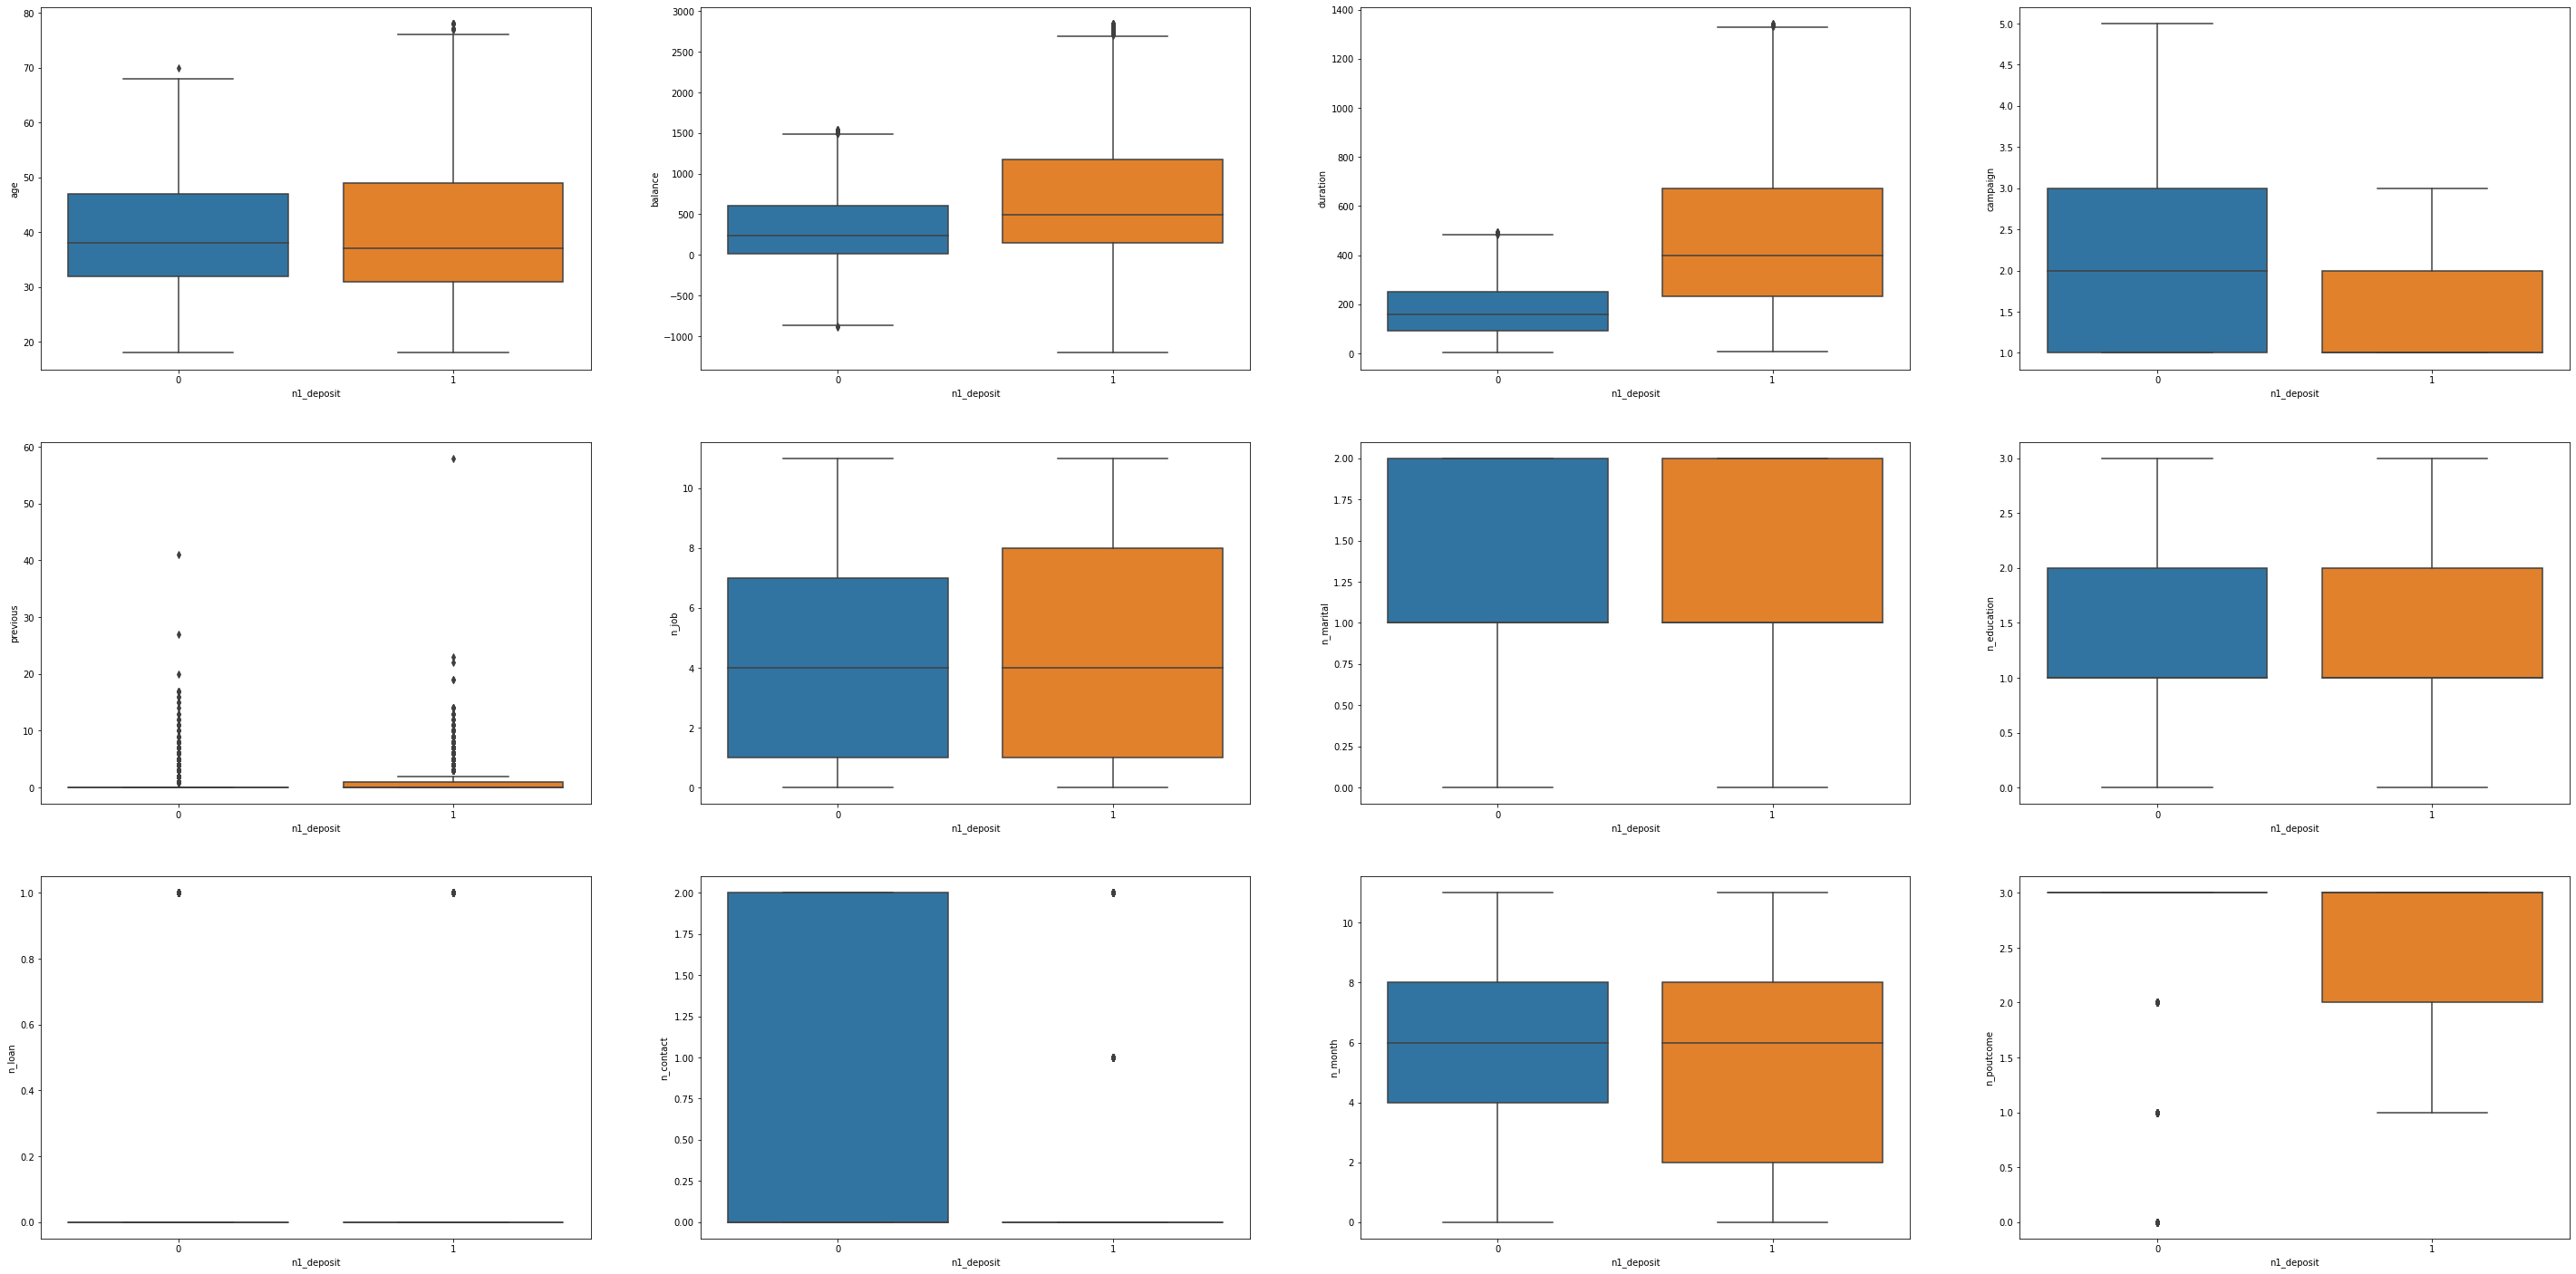

In [ ]:
figure, axis = plt.subplots(3, 4, figsize = (50,25))
sns.boxplot(x='n1_deposit',y='age',data=df_1,ax=axis[0,0])
sns.boxplot(x='n1_deposit',y='balance',data=df_1,ax=axis[0,1])
sns.boxplot(x='n1_deposit',y='duration',data=df_1,ax=axis[0,2])
sns.boxplot(x='n1_deposit',y='campaign',data=df_1,ax=axis[0,3])
sns.boxplot(x='n1_deposit',y='previous',data=df_1,ax=axis[1,0])
sns.boxplot(x='n1_deposit',y='n_job',data=df_1,ax=axis[1,1])
sns.boxplot(x='n1_deposit',y='n_marital',data=df_1,ax=axis[1,2])
sns.boxplot(x='n1_deposit',y='n_education',data=df_1,ax=axis[1,3])
sns.boxplot(x='n1_deposit',y='n_loan',data=df_1,ax=axis[2,0])
sns.boxplot(x='n1_deposit',y='n_contact',data=df_1,ax=axis[2,1])
sns.boxplot(x='n1_deposit',y='n_month',data=df_1,ax=axis[2,2])
sns.boxplot(x='n1_deposit',y='n_poutcome',data=df_1,ax=axis[2,3])

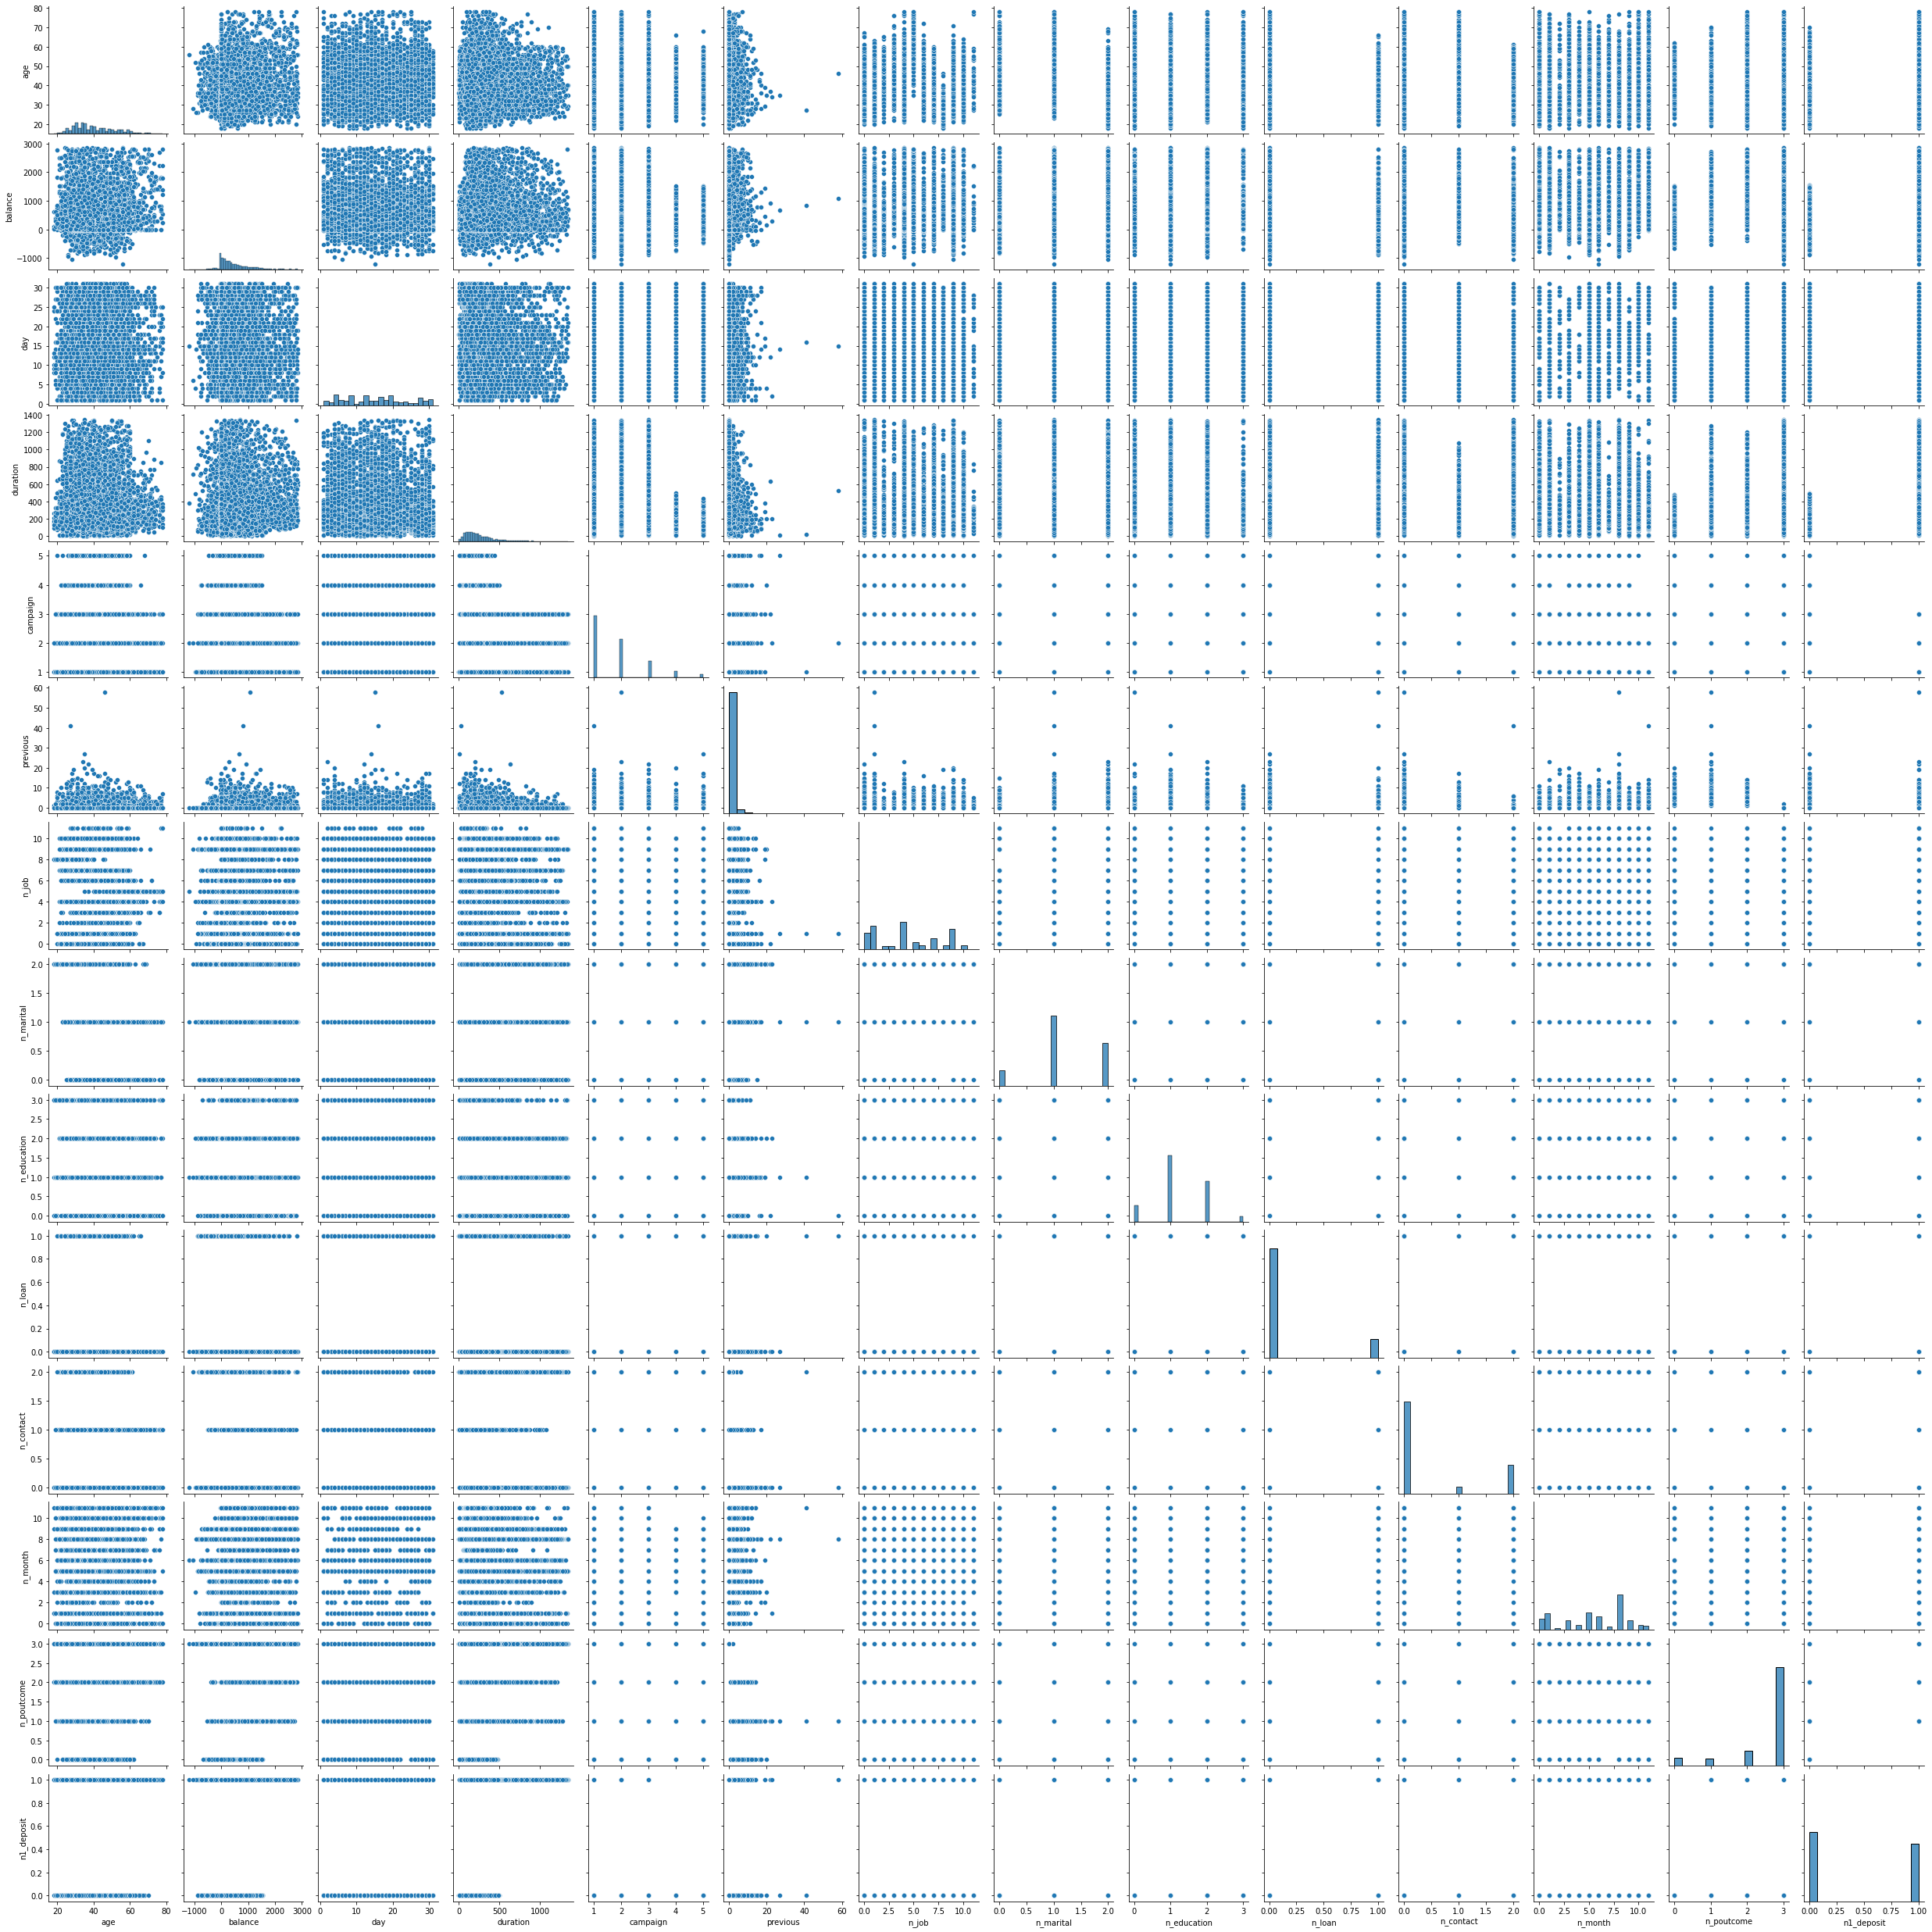

In [ ]:
sns.pairplot(df_1)

# Correlation Matrix

<AxesSubplot:>

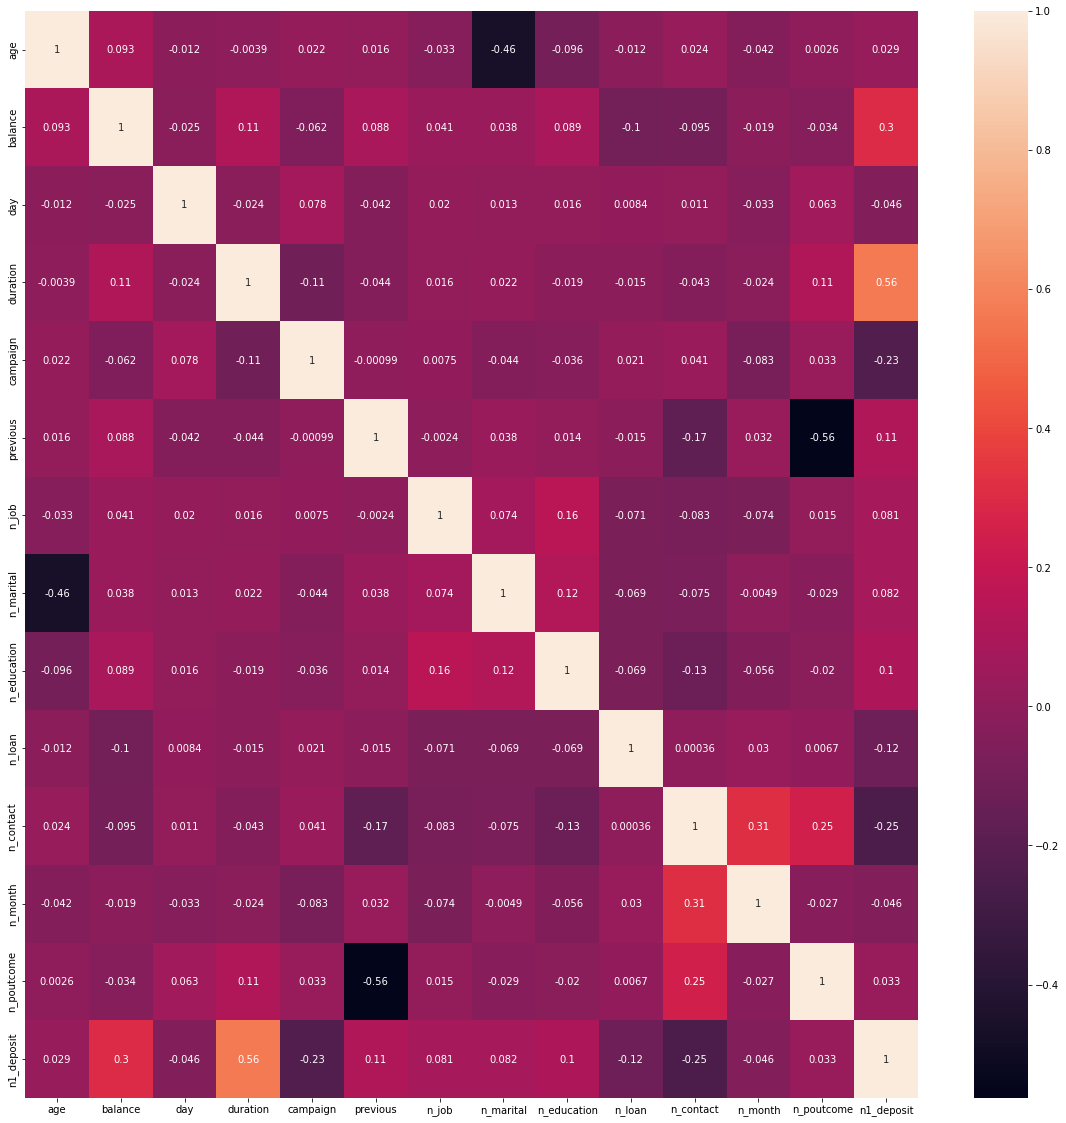

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_1.corr(),annot =True)

**High correlation between feature and target label
1)duration(0.56)
2)balance(0.30)
3)n_contact(-0.25)
4)campaign(-0.23)
5)n_loan(-0.12)
6)previous(0.11)
7)n_education(0.10)
**




In [ ]:
df_1

,age,balance,day,duration,campaign,previous,n_job,n_marital,n_education,n_loan,n_contact,n_month,n_poutcome,n1_deposit
5289,57,604,19,187,1,0,5,2,0,0,0,9,3,0
5290,45,0,17,102,1,0,0,0,1,0,0,9,3,0
5291,48,238,2,118,2,1,1,1,1,1,0,6,2,0
5292,34,673,29,89,1,2,0,2,1,0,0,4,0,0
5295,35,347,20,231,1,0,6,1,1,0,2,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5284,78,1389,8,335,1,0,5,0,0,0,0,0,3,1
5285,30,398,27,102,1,3,4,2,2,0,0,10,2,1
5286,69,247,22,138,2,0,5,0,2,0,0,0,3,1
5287,48,0,28,431,2,0,2,1,1,1,0,5,3,1


In [ ]:
x=df_1.drop(['n1_deposit','age','day','n_job','n_marital','n_month','n_poutcome'],axis=1).values
print(x)
y=df_1['n1_deposit'].values
print(y)


[[604 187   1 ...   0   0   0]
 [  0 102   1 ...   1   0   0]
 [238 118   2 ...   1   1   0]
 ...
 [247 138   2 ...   2   0   0]
 [  0 431   2 ...   1   1   0]
 [131 151   1 ...   1   0   0]]
[0 0 0 ... 1 1 1]


# Splitting of Data

In [ ]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)

# Scale the data to improve model performance

In [ ]:
from sklearn.preprocessing import StandardScaler
std_model=StandardScaler()
x_train_std_features=std_model.fit_transform(x_train)
x_test_std_features=std_model.transform(x_test)

In [ ]:
x_train_std_features.shape

(5438, 7)

In [ ]:
x_test_std_features.shape

(1360, 7)

# Model Building(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
modelreg=LogisticRegression()

In [ ]:
modelreg.fit(x_train_std_features,y_train)

LogisticRegression()

In [ ]:
ypred=modelreg.predict(x_test_std_features)
ypred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
modelreg.score(x_test_std_features,y_test)

0.8227941176470588

In [ ]:
x_test_std_features.shape

(1360, 7)

In [ ]:
y_test.shape

(1360,)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, ypred))
print("Precision:",metrics.precision_score(y_test, ypred))
print("Recall:",metrics.recall_score(y_test, ypred))

Accuracy: 0.8227941176470588
Precision: 0.8229342327150084
Recall: 0.782051282051282


In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, ypred)
cnf_matrix

array([[631, 105],
       [136, 488]])

# Model Building(KNeighborsClassifier)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNN_model.fit(x_train_std_features, y_train)

KNeighborsClassifier()

In [ ]:
y_predicted_KNN = KNN_model.predict(x_test_std_features)

In [ ]:
KNN_model.score(x_test_std_features,y_test)

0.8169117647058823

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_KNN))
print("Precision:",metrics.precision_score(y_test,y_predicted_KNN))
print("Recall:",metrics.recall_score(y_test, y_predicted_KNN))

Accuracy: 0.8169117647058823
Precision: 0.8140703517587939
Recall: 0.7788461538461539


# Model Building(Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model= GaussianNB()
naive_bayes_model.fit(x_train_std_features, y_train)

GaussianNB()

In [ ]:
y_predicted_naive = naive_bayes_model.predict(x_test_std_features)

In [ ]:
naive_bayes_model.score(x_test_std_features,y_test)

0.8198529411764706

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predicted_naive))
print("Precision:",metrics.precision_score(y_test,y_predicted_naive))
print("Recall:",metrics.recall_score(y_test, y_predicted_naive))

Accuracy: 0.8198529411764706
Precision: 0.8365896980461812
Recall: 0.7548076923076923


# Model Building(Decision Tree Classifier)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
deseciontree_model=DecisionTreeClassifier()
deseciontree_model.fit(x_train_std_features, y_train)

DecisionTreeClassifier()

In [ ]:
y_predicted_deseciontree = deseciontree_model.predict(x_test_std_features)
deseciontree_model.score(x_test_std_features,y_test)

0.8095588235294118

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_deseciontree))
print("Precision:",metrics.precision_score(y_test,y_predicted_deseciontree))
print("Recall:",metrics.recall_score(y_test, y_predicted_deseciontree))

Accuracy: 0.8095588235294118
Precision: 0.797716150081566
Recall: 0.7836538461538461


# Model Building(Random Forest Classifier)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest_model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
randomforest_model.fit(x_train_std_features, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predicted_randomforest = randomforest_model.predict(x_test_std_features)
randomforest_model.score(x_test_std_features,y_test)

0.8397058823529412

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_randomforest))
print("Precision:",metrics.precision_score(y_test,y_predicted_randomforest))
print("Recall:",metrics.recall_score(y_test, y_predicted_randomforest))

Accuracy: 0.8397058823529412
Precision: 0.8625
Recall: 0.7740384615384616


# Model Building(SVM using RBF kernel)

In [ ]:
from sklearn.svm import SVC
SVM_model_rbf=SVC(kernel='rbf')
SVM_model_rbf.fit(x_train_std_features,y_train)

SVC()

In [ ]:
y_predicted_SVM_rbf = SVM_model_rbf.predict(x_test_std_features)
SVM_model_rbf.score(x_test_std_features,y_test)

0.8419117647058824

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_rbf))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_rbf))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_rbf))

Accuracy: 0.8419117647058824
Precision: 0.853195164075993
Recall: 0.7916666666666666


# Model Building(SVM using linear kernel)

In [ ]:
from sklearn.svm import SVC
SVM_model_linear=SVC(kernel='linear')
SVM_model_linear.fit(x_train_std_features,y_train)

SVC(kernel='linear')

In [ ]:
y_predicted_SVM_linear = SVM_model_linear.predict(x_test_std_features)

In [ ]:
SVM_model_linear.score(x_test_std_features,y_test)

0.8264705882352941

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_SVM_linear))
print("Precision:",metrics.precision_score(y_test,y_predicted_SVM_linear))
print("Recall:",metrics.recall_score(y_test, y_predicted_SVM_linear))

Accuracy: 0.8264705882352941
Precision: 0.8277027027027027
Recall: 0.7852564102564102


# Model Building(Gradient Boosting Classifier)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradientB_model=GradientBoostingClassifier(n_estimators=100,learning_rate=1.0)

In [ ]:
GradientB_model.fit(x_train_std_features,y_train)
y_predicted_GradientB = GradientB_model.predict(x_test_std_features)

In [ ]:
GradientB_model.score(x_test_std_features,y_test)

0.8205882352941176

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_GradientB))
print("Precision:",metrics.precision_score(y_test,y_predicted_GradientB))
print("Recall:",metrics.recall_score(y_test, y_predicted_GradientB))

Accuracy: 0.8205882352941176
Precision: 0.8145695364238411
Recall: 0.7884615384615384


# Model Building(AdaBoost Classifier)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
Adaboost_model=AdaBoostClassifier(n_estimators=100)

In [ ]:
Adaboost_model.fit(x_train_std_features,y_train)
y_predicted_Adaboost = Adaboost_model.predict(x_test_std_features)

In [ ]:
Adaboost_model.score(x_test_std_features,y_test)

0.8566176470588235

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predicted_Adaboost))
print("Precision:",metrics.precision_score(y_test,y_predicted_Adaboost))
print("Recall:",metrics.recall_score(y_test, y_predicted_Adaboost))

Accuracy: 0.8566176470588235
Precision: 0.8580968280467446
Recall: 0.8237179487179487


# Final Report

In [ ]:
dfnew = pd.DataFrame()
dfnew['Names'] = ['LogisticRegression','KNeighborsClassifier','GaussianNB','DecisionTreeClassifier','RandomForestClassifier','SVM_RBF','SVM_Linear','GradientBoostingClassifier','AdaBoostClassifier']
dfnew['Score'] = [0.8411764705882353,0.8235294117647058,0.8213235294117647,0.8154411764705882,0.8286764705882353,0.8485294117647059,0.8404411764705882,0.8404411764705882,0.8551470588235294]
dfnew['precision']=[0.8547008547008547,0.831918505942275,0.8540145985401459,0.790519877675841,0.8466898954703833,0.8828828828828829,0.8544520547945206,0.8544520547945206,0.8754325259515571]
dfnew['recall']=[0.7923930269413629,0.7765451664025357,0.7416798732171157,0.8193343898573693,0.7702060221870047,0.7765451664025357,0.7908082408874801,0.7908082408874801,0.8019017432646592]
dfnew


,Names,Score,precision,recall
0,LogisticRegression,0.841176,0.854701,0.792393
1,KNeighborsClassifier,0.823529,0.831919,0.776545
2,GaussianNB,0.821324,0.854015,0.741680
3,DecisionTreeClassifier,0.815441,0.790520,0.819334
4,RandomForestClassifier,0.828676,0.846690,0.770206
5,SVM_RBF,0.848529,0.882883,0.776545
6,SVM_Linear,0.840441,0.854452,0.790808
7,GradientBoostingClassifier,0.840441,0.854452,0.790808
8,AdaBoostClassifier,0.855147,0.875433,0.801902


In [ ]:
cm = sns.light_palette('navy',as_cmap=True)
s = dfnew.style.background_gradient(cmap=cm)
s

,Names,Score,precision,recall
0,LogisticRegression,0.841176,0.854701,0.792393
1,KNeighborsClassifier,0.823529,0.831919,0.776545
2,GaussianNB,0.821324,0.854015,0.741680
3,DecisionTreeClassifier,0.815441,0.790520,0.819334
4,RandomForestClassifier,0.828676,0.846690,0.770206
5,SVM_RBF,0.848529,0.882883,0.776545
6,SVM_Linear,0.840441,0.854452,0.790808
7,GradientBoostingClassifier,0.840441,0.854452,0.790808
8,AdaBoostClassifier,0.855147,0.875433,0.801902


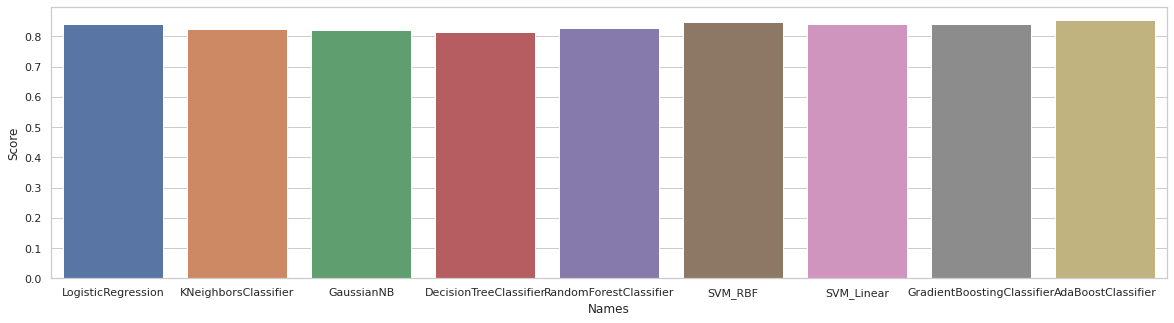

In [ ]:
plt.figure(figsize=(20,5))
sns.set(style="whitegrid")
ax = sns.barplot(y ='Score',x = 'Names',data = dfnew)

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report_Adaboost = classification_report(y_test,y_predicted_Adaboost)
print(report_Adaboost)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       736
           1       0.86      0.82      0.84       624

    accuracy                           0.86      1360
   macro avg       0.86      0.85      0.86      1360
weighted avg       0.86      0.86      0.86      1360



In [ ]:
roc_auc_score(y_test,y_predicted_Adaboost)

0.854114409141583

In [ ]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted_Adaboost)
auc = auc(fpr,tpr)

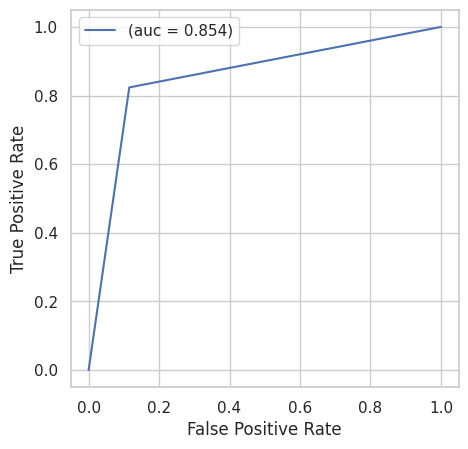

In [ ]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion:
**The dataset contained 16 features and 1 target variable for binary classification which determines if client will subscribe deposit or not.I have done feature extraction and got 7 important features, then applied various classification algorithms on the data which made it clear that Adaboost Classifier Model performed excellent with high accuracy(85%) compared to other algorithms.**